In [86]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, scipy.stats as st

matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.handleheight'] = 1

sns.set_context('paper', font_scale=2.0)
sns.set_style("whitegrid")
%matplotlib inline

In [87]:
df = pd.read_csv('../../thesis/references/TestAccurracy.csv', sep=';')
df.head()

,id,set,year,onset_date,onset,y_true,pred_date,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
0,34,test,1985,30.05.1985,imd,1,05/29,1.24,0.2358,0.2358,-0.05,-1.0528,1.0528
1,34,test,1985,30.05.1985,imd,2,05/28,1.56,-0.4440,0.4440,0.07,-1.9341,1.9341
2,34,test,1985,30.05.1985,imd,3,05/27,2.07,-0.9344,0.9344,0.88,-2.1163,2.1163
3,34,test,1985,30.05.1985,imd,4,05/26,3.14,-0.8569,0.8569,1.91,-2.0944,2.0944
4,34,test,1985,30.05.1985,imd,5,05/25,4.26,-0.7444,0.7444,2.51,-2.4933,2.4933


In [88]:
df = df[df['set'] != 'dev'].sort_values(by=['set', 'pred_date'])

In [89]:
set_groups = df.groupby(['set']).mean().reset_index()
set_groups

,set,year,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
0,0-EV12,2004.750000,15.5,13.520892,-1.979128,4.156576,16.431608,0.931637,4.113435
1,1-EV07,2004.750000,15.5,14.181850,-1.318286,3.693375,15.988292,0.488359,3.051777
2,2-EV02,2004.750000,15.5,14.185392,-1.314612,2.969493,15.880625,0.380636,2.815430
3,3-EV02,2004.750000,15.5,13.926692,-1.573395,3.300530,15.601992,0.101898,3.001085
4,4-EV06,2004.750000,15.5,14.534567,-0.965242,4.042560,18.240450,2.740472,4.659810
5,test,2007.442308,15.5,15.543263,0.043174,3.579571,16.653292,1.153315,3.158636


In [90]:
y_true_means = df.groupby(['set', 'y_true']).mean().reset_index()
y_true_means.head()

,set,y_true,year,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
0,0-EV12,1,2004.75,1.60575,0.605295,2.927180,3.86800,2.867925,3.946185
1,0-EV12,2,2004.75,2.22325,0.223705,3.089470,4.60575,2.605365,3.993235
2,0-EV12,3,2004.75,2.90700,-0.093392,3.252578,5.40125,2.401945,4.014540
3,0-EV12,4,2004.75,3.77950,-0.220587,3.400478,6.32975,2.329573,4.105643
4,0-EV12,5,2004.75,4.59725,-0.402253,3.453093,7.25700,2.257065,4.196365


In [91]:
pred_date_means = df.groupby(['set', 'pred_date']).mean().reset_index()
pred_date_means.head()

,set,pred_date,year,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
0,0-EV12,04/23,2004.0,30.0,27.542,-2.45926,2.45926,30.328,0.32510,0.93854
1,0-EV12,04/24,2004.0,29.0,27.072,-1.92964,2.04076,29.424,0.42446,0.98834
2,0-EV12,04/25,2004.0,28.0,26.356,-1.64340,1.86592,28.874,0.87454,1.32154
3,0-EV12,04/26,2004.0,27.0,26.020,-0.98294,1.46686,28.326,1.32734,1.62334
4,0-EV12,04/27,2004.0,26.0,25.886,-0.11756,1.21404,28.384,2.38598,2.38598


In [92]:
year_groups = df.groupby(['set', 'year']).mean().reset_index()
year_groups.head()

,set,year,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
0,0-EV12,1985,15.5,13.597867,-1.901565,2.215406,15.589267,0.089365,1.389768
1,0-EV12,1995,15.5,10.411600,-5.088602,5.711794,13.313800,-2.186515,4.310344
2,0-EV12,2003,15.5,9.661667,-5.838252,5.838252,13.038867,-2.461124,2.533239
3,0-EV12,2004,15.5,17.824667,2.324699,3.204205,19.478267,3.978375,4.042386
4,0-EV12,2005,15.5,8.017000,-7.483506,7.483506,9.594667,-5.905123,5.905123


In [93]:
df.groupby(['set']).mean()

,year,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
set,,,,,,,,
0-EV12,2004.750000,15.5,13.520892,-1.979128,4.156576,16.431608,0.931637,4.113435
1-EV07,2004.750000,15.5,14.181850,-1.318286,3.693375,15.988292,0.488359,3.051777
2-EV02,2004.750000,15.5,14.185392,-1.314612,2.969493,15.880625,0.380636,2.815430
3-EV02,2004.750000,15.5,13.926692,-1.573395,3.300530,15.601992,0.101898,3.001085
4-EV06,2004.750000,15.5,14.534567,-0.965242,4.042560,18.240450,2.740472,4.659810
test,2007.442308,15.5,15.543263,0.043174,3.579571,16.653292,1.153315,3.158636


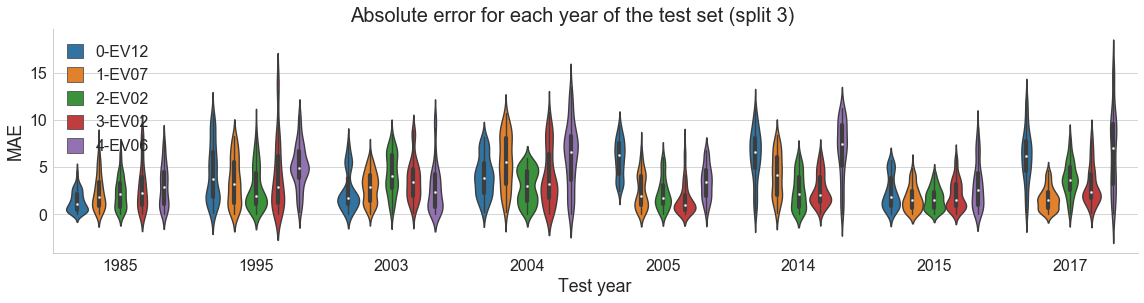

In [94]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='year', y='error_abs_latest', hue='set', kind='violin', aspect=4, size=4, legend=False)

ttl = g.fig.suptitle('Absolute error for each year of the test set (split 3)', size=20)
ttl.set_position([0.5, 1.04])

plt.legend(loc='upper left')
g.set_ylabels('MAE')
g.set_xlabels('Test year')

plt.tight_layout()
plt.savefig('prediction_years.png', bbox_inches='tight')

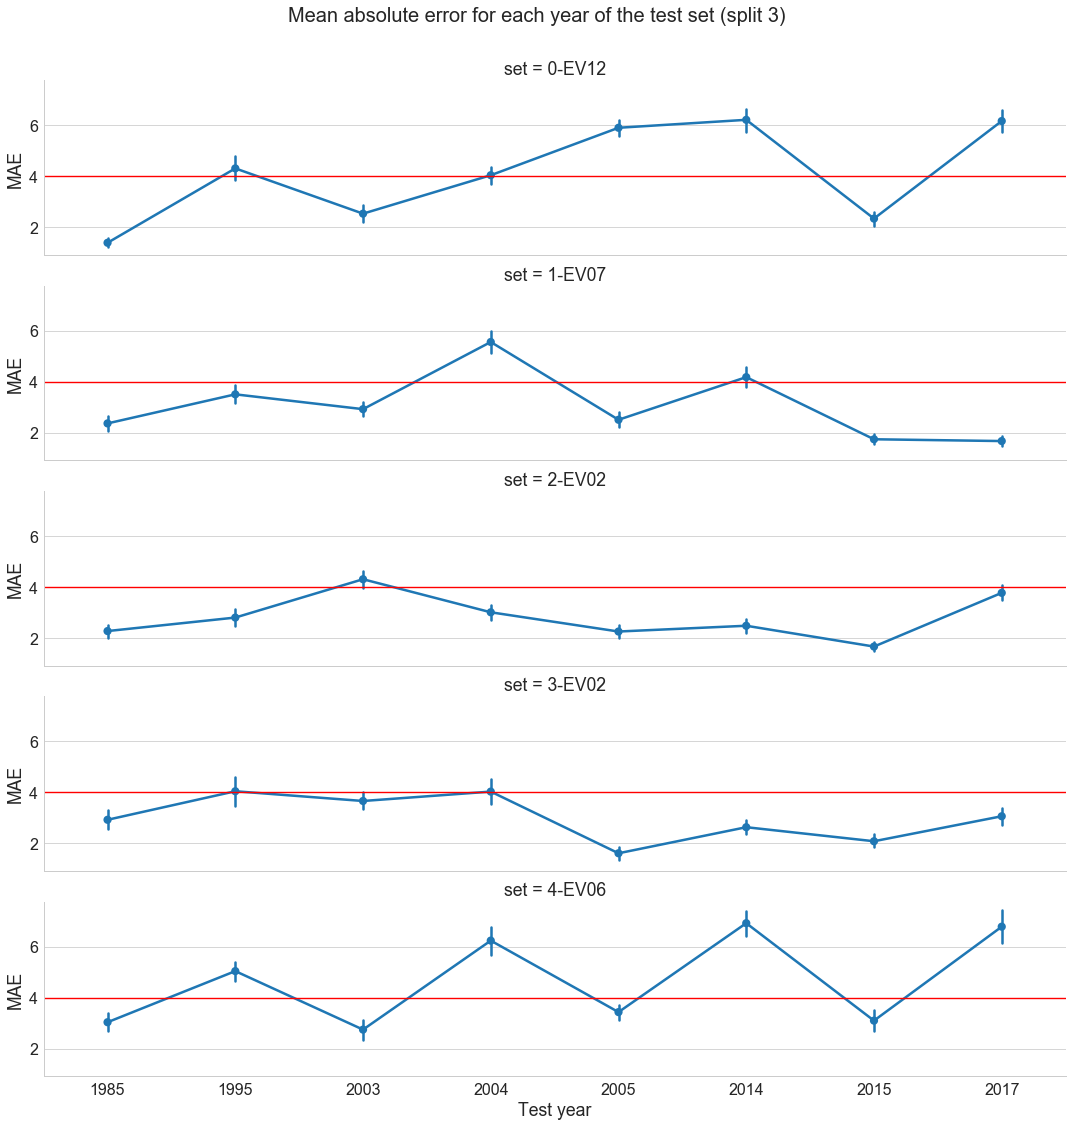

In [95]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='year', y='error_abs_latest', row='set', kind='point', aspect=5, size=3)
ttl = g.fig.suptitle('Mean absolute error for each year of the test set (split 3)', size=20)
ttl.set_position([0.5, 1.04])

g.map(plt.axhline, y=4, c='r')
g.set_ylabels('MAE')
g.set_xlabels('Test year')

plt.tight_layout()
plt.savefig('prediction_years_ci.png', bbox_inches='tight')

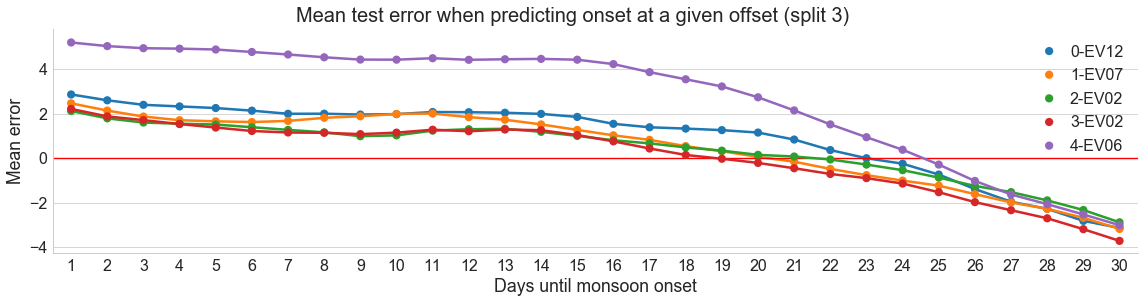

In [96]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='y_true', y='error_latest', hue='set', aspect=4, size=4, ci=None, legend=False)

ttl = g.fig.suptitle('Mean test error when predicting onset at a given offset (split 3)', size=20)
ttl.set_position([0.5, 1.04])

g.map(plt.axhline, y=0, c='r')
g.set_ylabels('Mean error')
g.set_xlabels('Days until monsoon onset')

plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('prediction_error_offset.png', bbox_inches='tight')

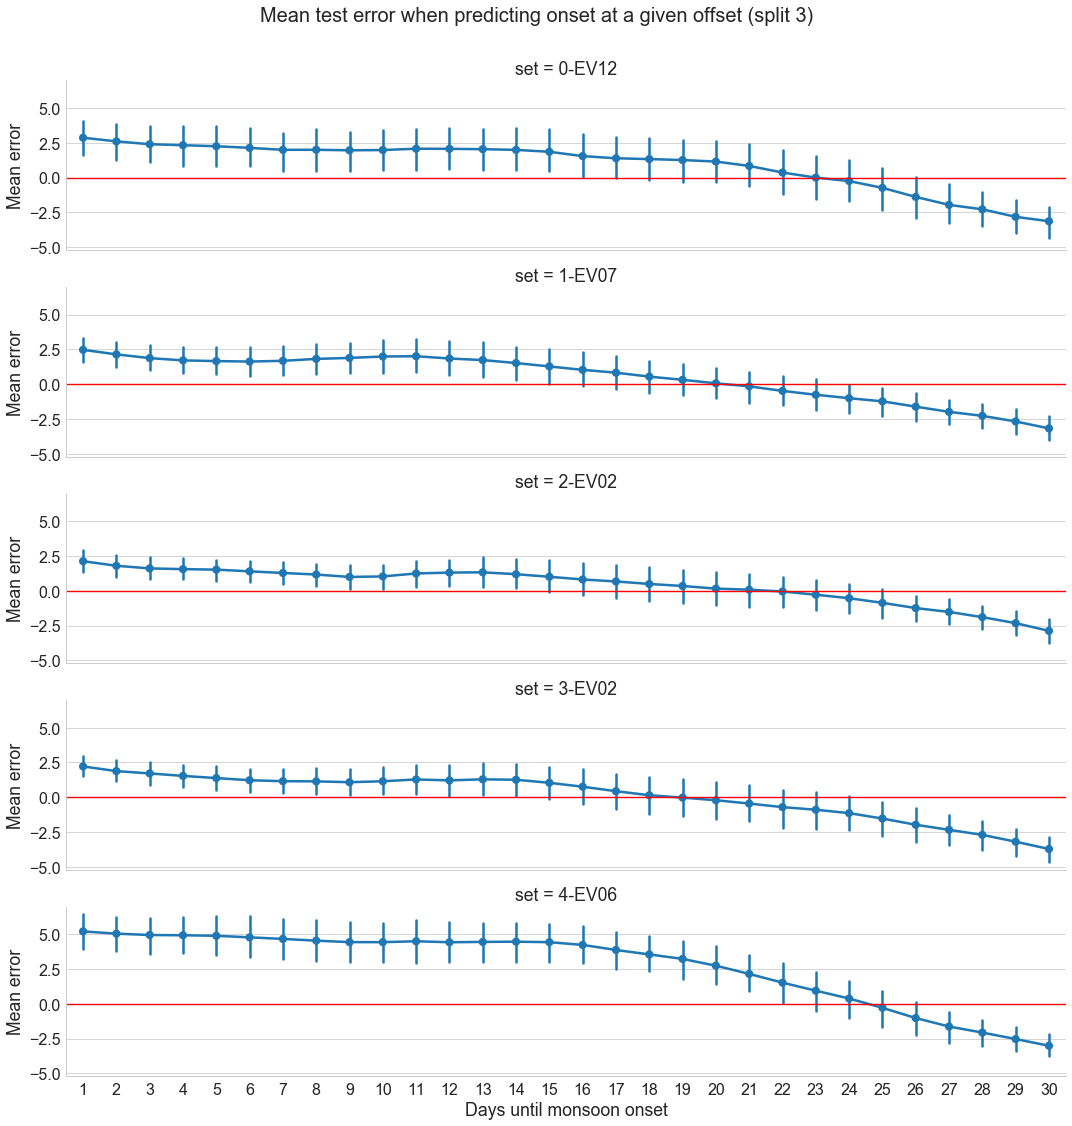

In [97]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='y_true', y='error_latest', row='set', aspect=5, size=3)

ttl = g.fig.suptitle('Mean test error when predicting onset at a given offset (split 3)', size=20)
ttl.set_position([0.5, 1.04])

g.map(plt.axhline, y=0, c='r')
g.set_ylabels('Mean error')
g.set_xlabels('Days until monsoon onset')

plt.tight_layout()
plt.savefig('prediction_error_offset_split.png', bbox_inches='tight')

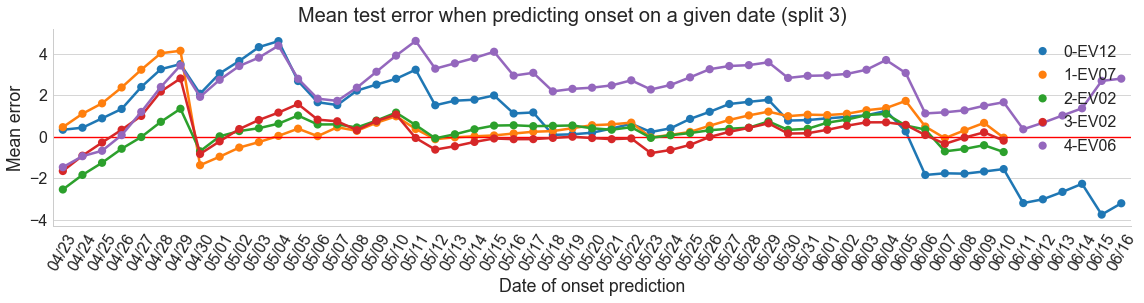

In [98]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='pred_date', y='error_latest', hue='set', aspect=4, size=4, ci=None, legend=False)

ttl = g.fig.suptitle('Mean test error when predicting onset on a given date (split 3)', size=20)
ttl.set_position([0.5, 1.04])

g.map(plt.axhline, y=0, c='r')
plt.xticks(rotation=60)
g.set_ylabels('Mean error')
g.set_xlabels('Date of onset prediction')

plt.legend(loc='best')
plt.tight_layout()
plt.savefig('prediction_error_dates.png', bbox_inches='tight')

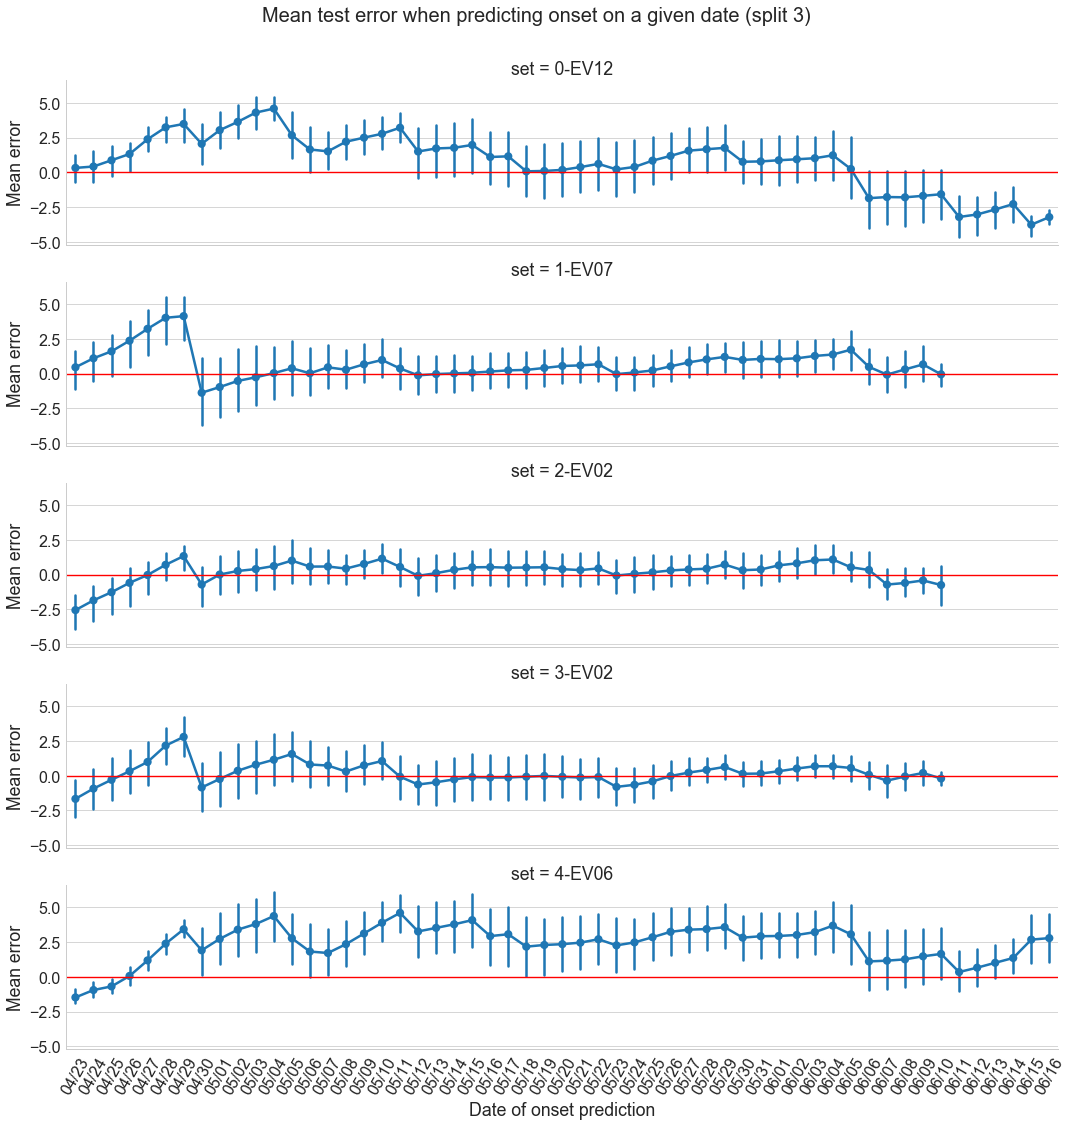

In [99]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='pred_date', y='error_latest', row='set', aspect=5, size=3)

ttl = g.fig.suptitle('Mean test error when predicting onset on a given date (split 3)', size=20)
ttl.set_position([0.5, 1.04])

g.map(plt.axhline, y=0, c='r')
g.set_ylabels('Mean error')
g.set_xlabels('Date of onset prediction')

plt.xticks(rotation=60)

plt.tight_layout()
plt.savefig('prediction_error_dates_split.png', bbox_inches='tight')

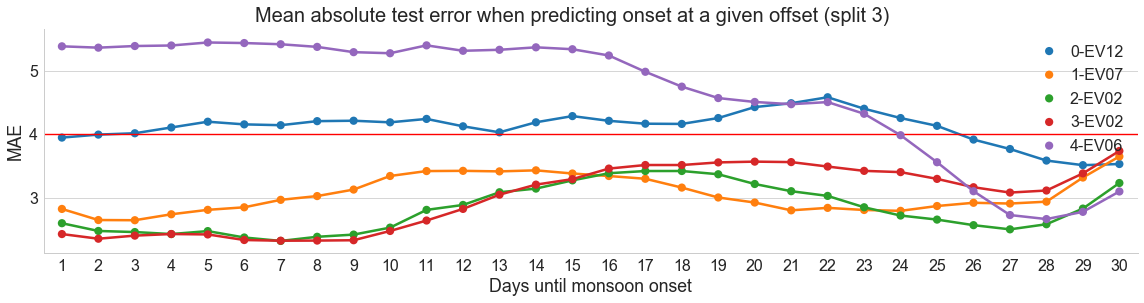

In [100]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='y_true', y='error_abs_latest', hue='set', aspect=4, size=4, ci=None, legend=False)

ttl = g.fig.suptitle('Mean absolute test error when predicting onset at a given offset (split 3)', size=20)
ttl.set_position([0.5, 1.04])

g.map(plt.axhline, y=4, c='r')
g.set_ylabels('MAE')
g.set_xlabels('Days until monsoon onset')

plt.legend(loc='best')
plt.tight_layout()
plt.savefig('prediction_accuracy_offset.png', bbox_inches='tight')

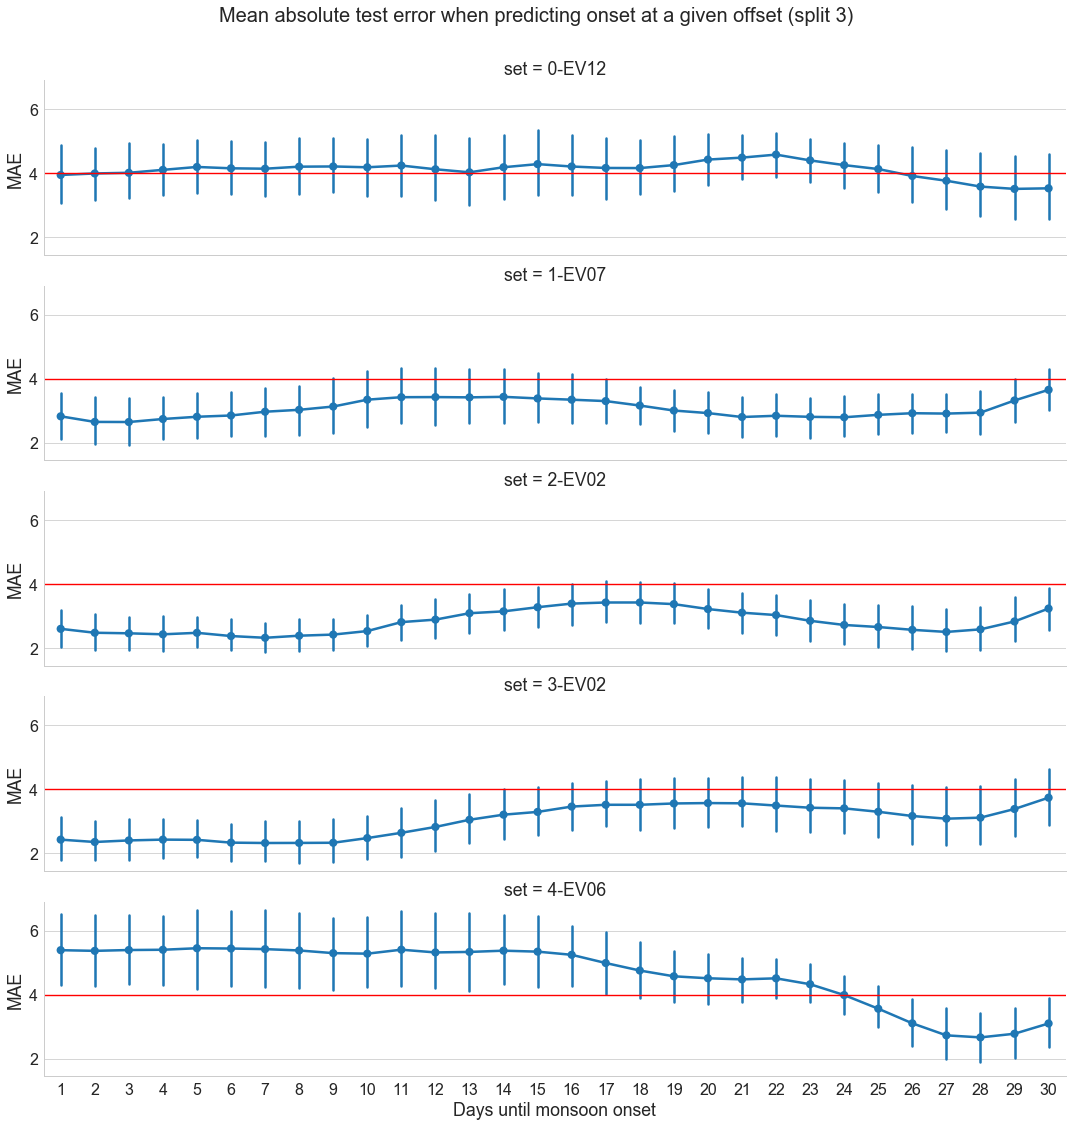

In [101]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='y_true', y='error_abs_latest', row='set', aspect=5, size=3)

ttl = g.fig.suptitle('Mean absolute test error when predicting onset at a given offset (split 3)', size=20)
ttl.set_position([0.5, 1.04])

g.map(plt.axhline, y=4, c='r')
g.set_ylabels('MAE')
g.set_xlabels('Days until monsoon onset')

plt.tight_layout()
plt.savefig('prediction_accuracy_offset_split.png', bbox_inches='tight')

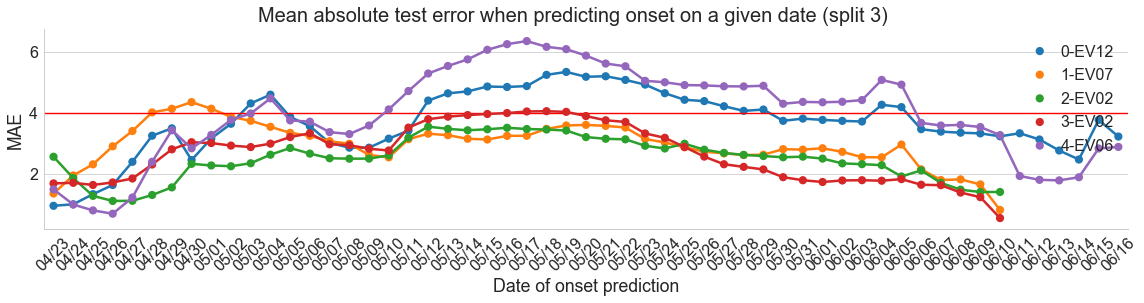

In [102]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='pred_date', y='error_abs_latest', hue='set', aspect=4, size=4, ci=None, legend=False)

ttl = g.fig.suptitle('Mean absolute test error when predicting onset on a given date (split 3)', size=20)
ttl.set_position([0.5, 1.04])

g.map(plt.axhline, y=4, c='r')
plt.xticks(rotation=45)
g.set_ylabels('MAE')
g.set_xlabels('Date of onset prediction')

plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('prediction_accuracy_dates.png', bbox_inches='tight')

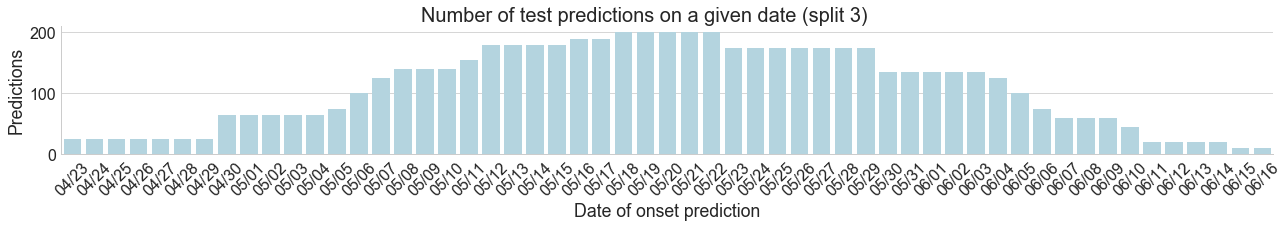

In [103]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='pred_date', kind='count', aspect=6, size=3, color='lightblue')

ttl = g.fig.suptitle('Number of test predictions on a given date (split 3)', size=20)
ttl.set_position([0.5, 1.04])

plt.xticks(rotation=45)
g.set_ylabels('Predictions')
g.set_xlabels('Date of onset prediction')

plt.tight_layout()
plt.savefig('prediction_accuracy_dates_dist.png', bbox_inches='tight')

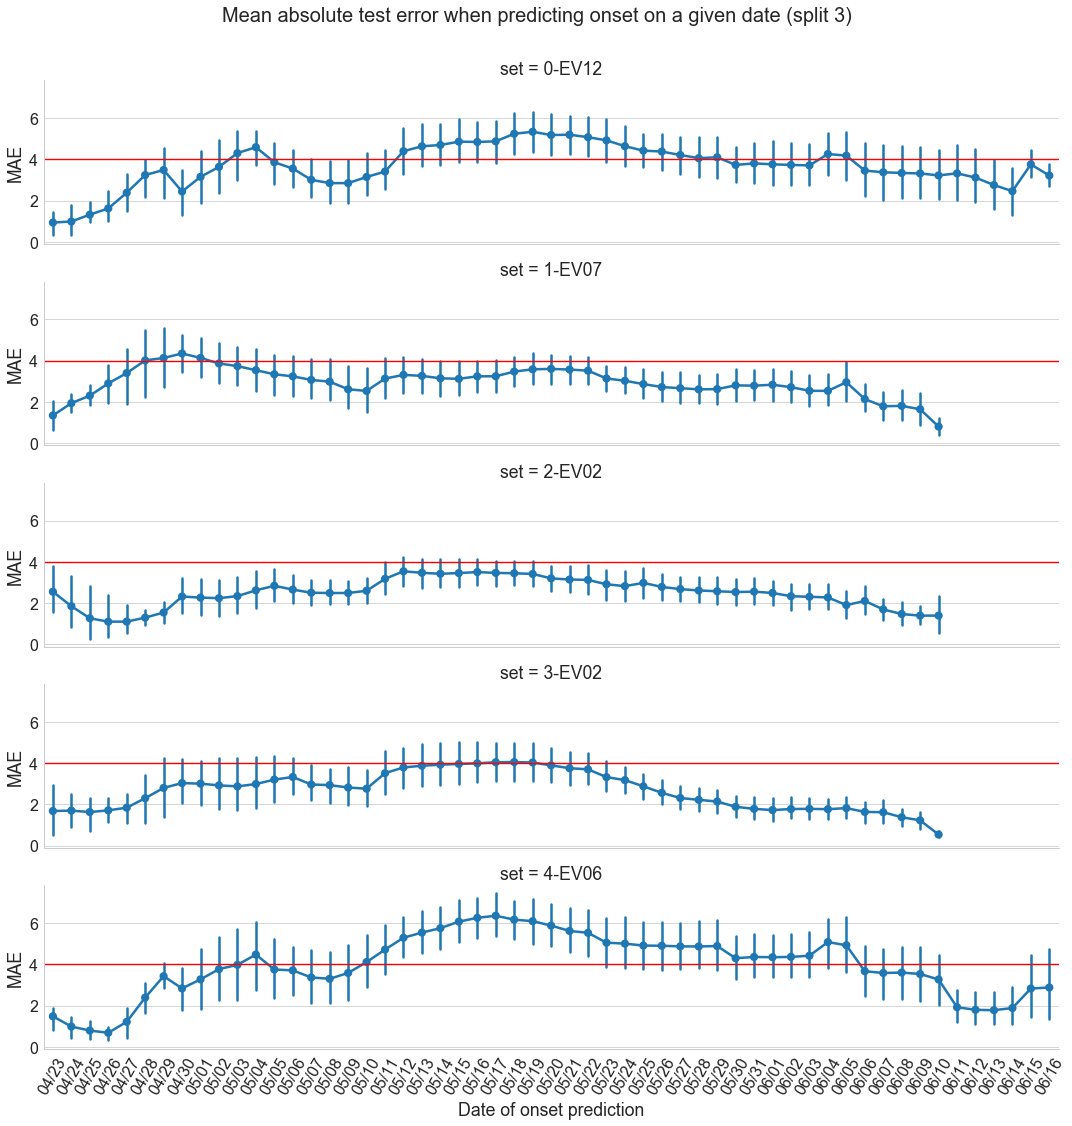

In [104]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='pred_date', y='error_abs_latest', row='set', aspect=5, size=3)

ttl = g.fig.suptitle('Mean absolute test error when predicting onset on a given date (split 3)', size=20)
ttl.set_position([0.5, 1.04])

plt.xticks(rotation=60)
g.map(plt.axhline, y=4, c='r')
g.set_ylabels('MAE')
g.set_xlabels('Date of onset prediction')

plt.tight_layout()
plt.savefig('prediction_accuracy_dates_split.png', bbox_inches='tight')